# Exploring Datas with Pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [7]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [8]:
df.shape

(13490604, 7)

In [9]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


# Data Visualization

## Introduction

In [3]:
df.rename(columns={'borough':'Wilayah', 'lsoa_code':'Kode_Polisi', 'major_category':'Kategori_Kejahatan_Terbesar', 'minor_category':'Kategori_Kejahatan_Terkecil', 'value':'Jumlah_Kejahatan_Sebulan', 'year':'Tahun', 'month':'Bulan'}, inplace=True)

In [4]:
df.set_index('Tahun', inplace=True)

In [6]:
df.sort_values(by='Jumlah_Kejahatan_Sebulan', ascending=False, inplace=True)

In [8]:
df.drop([2008, 2009, 2010], axis=0, inplace=True)

In [9]:
df.drop(['Kode_Polisi', 'Bulan'], axis=1, inplace=True)

In [10]:
kondisi = df['Jumlah_Kejahatan_Sebulan'] > 0
crime = df[kondisi]
crime

,Wilayah,Kategori_Kejahatan_Terbesar,Kategori_Kejahatan_Terkecil,Jumlah_Kejahatan_Sebulan
Tahun,,,,
2012,Tower Hamlets,Drugs,Possession Of Drugs,309
2011,Westminster,Theft and Handling,Other Theft,280
2011,Westminster,Theft and Handling,Other Theft,257
2011,Westminster,Theft and Handling,Other Theft,248
2012,Westminster,Theft and Handling,Other Theft,240
...,...,...,...,...
2012,Richmond upon Thames,Theft and Handling,Other Theft,1
2014,Bromley,Violence Against the Person,Common Assault,1
2013,Hillingdon,Theft and Handling,Theft From Motor Vehicle,1


## Area Plot

#### Jenis Kejahatan Major Apakah yang Terbanyak Selama 2016?

In [11]:
crime_area = crime.loc[2016, 'Kategori_Kejahatan_Terbesar':'Jumlah_Kejahatan_Sebulan']
crime_area1 = crime_area.Kategori_Kejahatan_Terbesar.value_counts()
crime_area2 = crime_area1.head()
crime_area3 = pd.DataFrame(crime_area2)
crime_area3

,Kategori_Kejahatan_Terbesar
Theft and Handling,129159
Violence Against the Person,123050
Criminal Damage,48584
Burglary,43020
Drugs,21782


In [12]:
crime_area4 = crime_area.Kategori_Kejahatan_Terkecil.value_counts()
crime_area5 = crime_area4.head()
crime_area6 = pd.DataFrame(crime_area5)
crime_area6

,Kategori_Kejahatan_Terkecil
Harassment,36213
Other Theft,33190
Common Assault,31306
Theft From Motor Vehicle,29211
Assault with Injury,27667


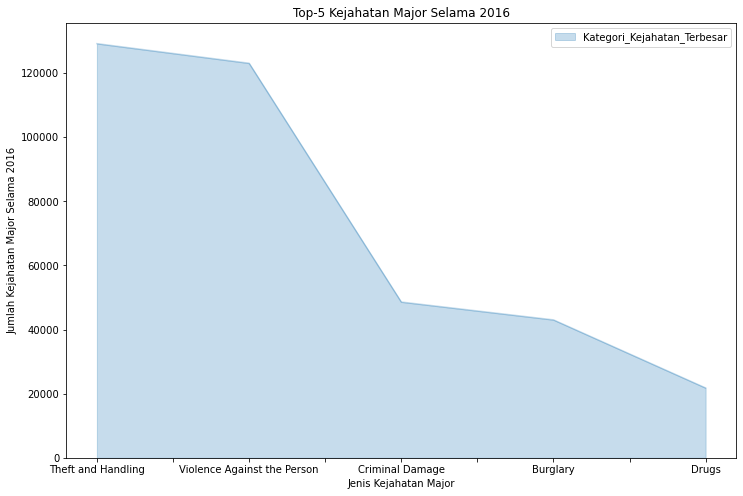

In [13]:
crime_area3.plot(kind='area',
                alpha=0.25,
                stacked=False,
                figsize=(12,8));
plt.title("Top-5 Kejahatan Major Selama 2016");
plt.xlabel("Jenis Kejahatan Major");
plt.ylabel("Jumlah Kejahatan Major Selama 2016");

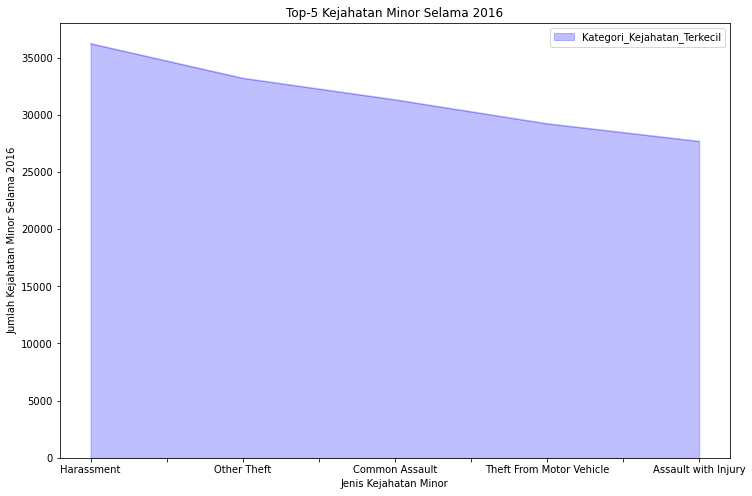

In [14]:
crime_area6.plot(kind='area',
                color='blue',
                alpha=0.25,
                stacked=False,
                figsize=(12,8));
plt.title("Top-5 Kejahatan Minor Selama 2016");
plt.xlabel("Jenis Kejahatan Minor");
plt.ylabel("Jumlah Kejahatan Minor Selama 2016");

Kejahatan Terbanyak selama 2016 adalah Theft and Handling {Untuk Kejahatan Major} dan Harrasment {Untuk Kejahatan Minor}

## Histogram

#### Bagaimana Frekuensi Kejahatan di Wilayah London?

In [15]:
df_histogram = pd.read_csv('london_crime_by_lsoa.csv')
df_histogram.rename(columns={'borough':'Wilayah', 'lsoa_code':'Kode_Polisi', 'major_category':'Kategori_Kejahatan_Terbesar', 'minor_category':'Kategori_Kejahatan_Terkecil', 'value':'Jumlah_Kejahatan_Sebulan', 'year':'Tahun', 'month':'Bulan'}, inplace=True)
# df_histogram.set_index('Wilayah', inplace=True)
# df_histogram1 = df_histogram.loc[['Kingston upon Thames', 'Camden', 'Lambeth'], 'Jumlah_Kejahatan_Sebulan':'Tahun']
# df_histogram1 = df_histogram.loc[:, ['Wilayah', 'Jumlah_Kejahatan_Sebulan', 'Tahun']]

In [16]:
a = pd.DataFrame(df_histogram.Wilayah.value_counts())
a

,Wilayah
Croydon,602100
Barnet,572832
Ealing,549396
Bromley,523908
Lambeth,519048
Enfield,511164
Wandsworth,498636
Brent,490644
Lewisham,485136
Southwark,483300


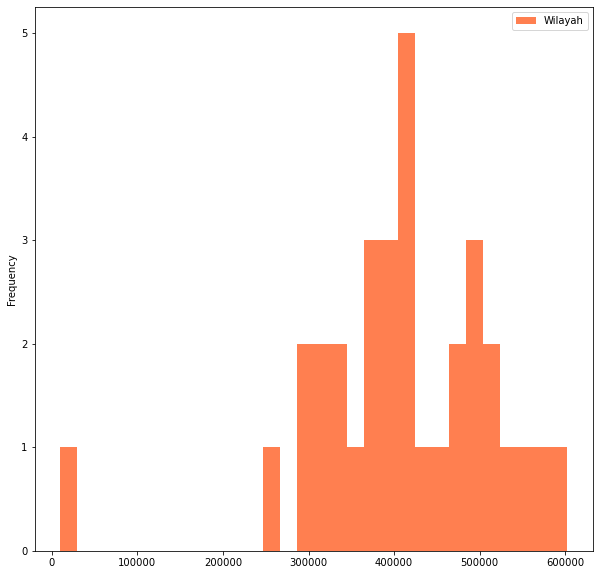

In [17]:
a.plot(kind='hist',
        stacked=True,
        bins=30,
        figsize=(10,10),
        color=['coral', 'darkslateblue', 'mediumseagreen']);

Kasus Kejahatan dengan Frekuensi terbanyak terjadi di kisaran 400000 buah di wilayah London selama 2008 - 2016

## Bar Chart

#### Bagaimana Perkembangan Kejahatan di Wilayah London Selama 2011 - 2016?

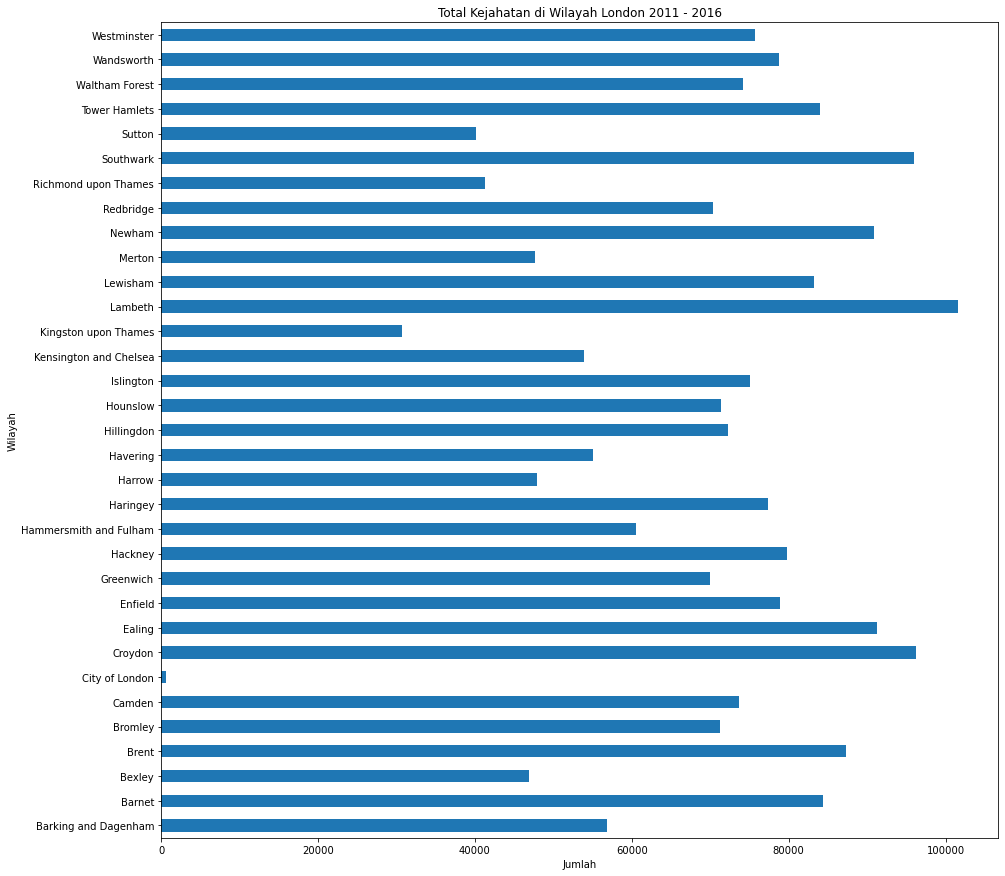

In [18]:
crime.groupby('Wilayah')['Jumlah_Kejahatan_Sebulan'].count().plot(kind='barh', figsize=(15,15));
plt.title("Total Kejahatan di Wilayah London 2011 - 2016");
plt.xlabel("Jumlah");
plt.ylabel("Wilayah");

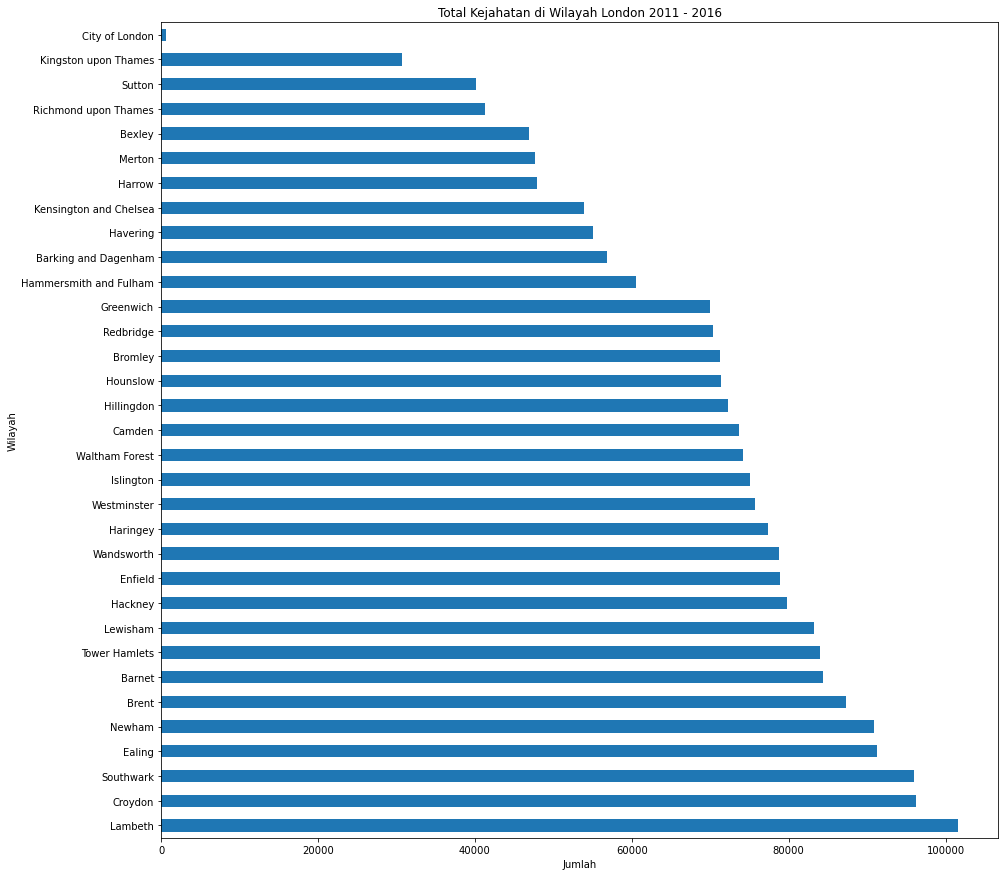

In [19]:
crime.Wilayah.value_counts().plot(kind='barh', figsize=(15,15));
plt.title("Total Kejahatan di Wilayah London 2011 - 2016");
plt.xlabel("Jumlah");
plt.ylabel("Wilayah");

Kejahatan Selama 2011 - 2016 terbanyak di Kota Lambeth, sedangkan paling sedikit di City of London

## Pie Chart

#### Wilayah Mana Sajakah yang Mempunyai Kejahatan Terbanyak di London Selama 2011 - 2016?

In [20]:
crime_pie = crime.Wilayah.value_counts()
crime_pie1 = crime_pie.head()

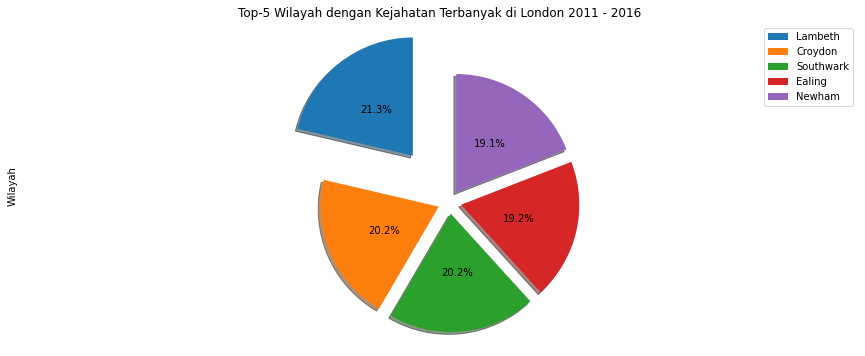

In [22]:
crime_pie1.plot(kind='pie',
               figsize=(15,6),
               autopct="%.1f%%",
               labels=None,
               shadow=True,
               startangle=90,
               pctdistance=0.5,
               explode=[0.5, 0.1, 0.1, 0.1, 0.1]);
plt.axis('equal');
plt.legend(labels=crime_pie1.index);
plt.title("Top-5 Wilayah dengan Kejahatan Terbanyak di London 2011 - 2016");

Kejahatan terbanyak selama 2011 - 2016 terjadi di Wilayah Lambeth

## Box Plot

#### Bagaimana Cara Membaca Data Kejahatan di Wilayah London?

In [24]:
b = pd.DataFrame(crime.Wilayah.value_counts())
b

,Wilayah
Lambeth,101617
Croydon,96281
Southwark,96039
Ealing,91209
Newham,90918
Brent,87285
Barnet,84429
Tower Hamlets,84036
Lewisham,83263
Hackney,79736


Text(0.5, 1.0, 'Box Plot Dari Data Kejahatan di Wilayah London')

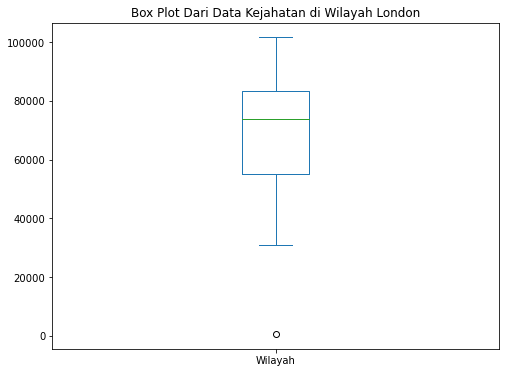

In [25]:
b.plot(kind='box', figsize=(8,6));

plt.title("Box Plot Dari Data Kejahatan di Wilayah London")

Data menunjukkan bahwa terdapat outlier di '0', nilai minimum di kisaran 37000, nilai maksimum di kisaran 100000, median di kisaran 76000, quartil atas di kisaran 82000, dan kuartil bawah di kisaran 60000

## Scatter Plot

#### Bagaimana Perkembangan Kejahatan selama 2008 - 2016 di Wilayah London?

In [57]:
df_scat = pd.read_csv('london_crime_by_lsoa.csv')
df_scat.rename(columns={'borough':'Wilayah', 'lsoa_code':'Kode_Polisi', 'major_category':'Kategori_Kejahatan_Terbesar', 'minor_category':'Kategori_Kejahatan_Terkecil', 'value':'Jumlah_Kejahatan_Sebulan', 'year':'Tahun', 'month':'Bulan'}, inplace=True)
b = df_scat.loc[:, ['Tahun', 'Jumlah_Kejahatan_Sebulan']]
b

,Tahun,Jumlah_Kejahatan_Sebulan
0,2016,0
1,2016,0
2,2015,0
3,2016,0
4,2008,0
...,...,...
13490599,2015,0
13490600,2015,1
13490601,2011,0
13490602,2011,0


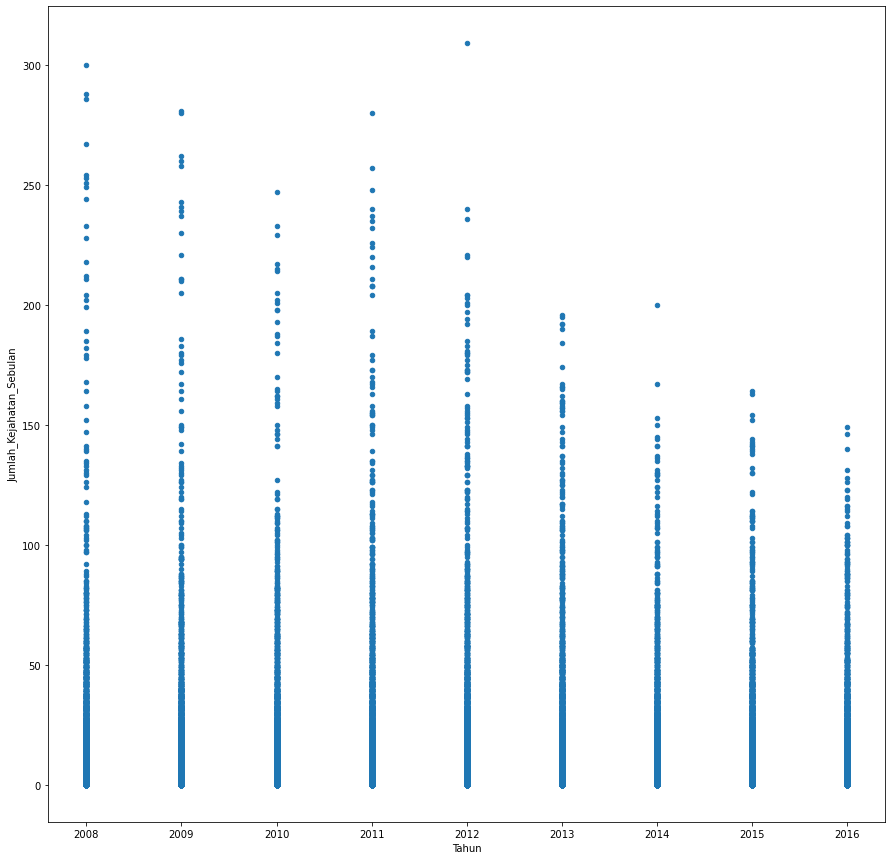

In [58]:
b.plot(kind='scatter', x='Tahun', y='Jumlah_Kejahatan_Sebulan', figsize=(15,15));

Data menunjukkan bahwa dari tahun 2008 - 2016 terjadi penurunan jumlah kejahatan